In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
tqdm.pandas()
pd.set_option('display.max_columns', 500)

sns.set_theme()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
pdf = pd.read_csv("./pp-complete.csv", header=None, names=[
    "uuid",
    "price",
    "date",
    "postal_code",
    "property_type",
    "new_build",
    "estate_type",
    "name_or_number",
    "flat_number",
    "street",
    "town_or_city",
    "district",
    "county",
    "locality",
    "unknown_0",
    "unknown_1"
], index_col=None)

In [22]:
pdf.to_feather("pdf.feather")

# pre-processing pdf

In [26]:
pdf.date = pdf.date.progress_apply(pd.Timestamp)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28919900/28919900 [01:23<00:00, 347145.37it/s]


In [30]:
pdf.property_type = pdf.property_type.astype("category")

In [31]:
pdf.new_build = pdf.new_build.astype("category")

In [35]:
pdf.estate_type = pdf.estate_type.astype("category")

In [36]:
pdf.dtypes

uuid                      object
price                      int64
date              datetime64[ns]
postal_code               object
property_type           category
new_build               category
estate_type             category
name_or_number            object
flat_number               object
street                    object
town_or_city              object
district                  object
county                    object
locality                  object
unknown_0                 object
unknown_1                 object
dtype: object

In [39]:
pdf.to_feather("pdf-processed.feather")

# attempt to combine ukpc

In [40]:
ukpc = pd.read_feather("ukpc.feather")

In [43]:
pdf.head()

,uuid,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,unknown_0,unknown_1
0,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21,NE4 9DN,S,N,F,8,NaN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A
1,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A
2,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A
3,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A
4,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A


In [42]:
ukpc

,postcode,latitude,longitude
id,,,
1,AB10 1XG,57.144156,-2.114864
2,AB10 6RN,57.137871,-2.121487
3,AB10 7JB,57.124274,-2.127206
4,AB11 5QN,57.142701,-2.093295
5,AB11 6UL,57.137468,-2.112455
...,...,...,...
2711464,YO7 4FB,54.243953,-1.472731
2711465,YO7 9DN,54.232597,-1.328747
2711466,YO8 4FS,53.779924,-1.069318


In [48]:
df = pd.merge(pdf, ukpc[['postcode', 'latitude', 'longitude']], left_on="postal_code", right_on="postcode", how="left")

In [49]:
df.shape

(28919900, 19)

In [50]:
pdf.shape

(28919900, 16)

In [51]:
df.to_feather("pdf-w-longlat.feather")

In [66]:
df.locality.unique()

array(['TYNE AND WEAR', 'THURROCK', 'CHESHIRE', 'STOCKTON-ON-TEES',
       'CUMBRIA', 'NORFOLK', 'SOUTH YORKSHIRE', 'GREATER LONDON',
       'NORTH YORKSHIRE', 'WEST MIDLANDS', 'SOMERSET', 'SLOUGH',
       'BRACKNELL FOREST', 'LANCASHIRE', 'WEST YORKSHIRE', 'SUFFOLK',
       'SOUTH GLAMORGAN', 'HAMPSHIRE', 'AVON', 'STAFFORDSHIRE',
       'MERSEYSIDE', 'CORNWALL', 'CLWYD', 'SOUTHEND-ON-SEA', 'HUMBERSIDE',
       'WEST SUSSEX', 'WARWICKSHIRE', 'NORTHAMPTONSHIRE', 'WARRINGTON',
       'SHROPSHIRE', 'HERTFORDSHIRE', 'BEDFORDSHIRE', 'BERKSHIRE',
       'OXFORDSHIRE', 'LINCOLNSHIRE', 'KENT', 'LEICESTERSHIRE', 'SURREY',
       'MID GLAMORGAN', 'HEREFORD AND WORCESTER', 'ESSEX',
       'GREATER MANCHESTER', 'BUCKINGHAMSHIRE', 'CONWY', 'NEWPORT',
       'MILTON KEYNES', 'CAMBRIDGESHIRE', 'SWANSEA', 'GLOUCESTERSHIRE',
       'BLACKPOOL', 'NORTHUMBERLAND', 'WORCESTERSHIRE', 'LUTON',
       'EAST SUSSEX', 'DERBYSHIRE', 'NOTTINGHAMSHIRE', 'BOURNEMOUTH',
       'GWENT', 'WOKINGHAM', 'STOKE-ON-TRENT'

# clean data and observe

In [102]:
_df = df[df.district == "LONDON"]

In [84]:
_df

,uuid,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,unknown_0,unknown_1,postcode,latitude,longitude
7,{568DE11A-432B-4DA3-B9A4-83B4EC4BD127},121250,1995-05-19,N12 8LR,F,N,L,CAVENDISH HOUSE,FLAT 20,WOODSIDE GRANGE ROAD,LONDON,LONDON,BARNET,GREATER LONDON,A,A,N12 8LR,51.621563,-0.180974
9,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01,SW18 5DH,T,N,F,149,NaN,TRENTHAM STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A,SW18 5DH,51.441303,-0.199497
16,{8A5F7A96-0865-46E3-B3D9-91F47C16313A},157500,1995-03-17,N19 5EX,S,N,F,104,NaN,LADY MARGARET ROAD,LONDON,LONDON,ISLINGTON,GREATER LONDON,A,A,N19 5EX,51.556565,-0.135414
17,{60CF8CE4-7269-4F41-9062-91F4932AC4A2},110995,1995-11-09,SW8 2PH,F,Y,L,10,41,PRIORY GROVE,LONDON,LONDON,LAMBETH,GREATER LONDON,A,A,SW8 2PH,51.474400,-0.129051
38,{8D28EE68-8F4F-4C7D-8A33-8E6335277383},180000,1995-11-16,NW8 9AA,F,N,L,7B,NaN,ABBEY ROAD,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A,NW8 9AA,51.532399,-0.178099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28919584,{1061746E-3DD1-3C34-E063-4804A8C0F9E7},530000,2024-01-12,SW1P 2BW,F,N,L,"VESTRY COURT, 5",FLAT 4,MONCK STREET,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A,SW1P 2BW,51.495787,-0.131009
28919585,{1061746E-3DDE-3C34-E063-4804A8C0F9E7},860000,2024-01-10,W2 4JZ,F,N,L,"LANCASTER CLOSE, 13 - 15",FLAT 45,ST PETERSBURGH PLACE,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A,W2 4JZ,51.511011,-0.191202
28919587,{1061746E-3DE5-3C34-E063-4804A8C0F9E7},450000,2024-01-03,NW4 1NW,F,N,L,"NORMANDY HOUSE, 3",FLAT 8,REGENCY CRESCENT,NaN,LONDON,BARNET,GREATER LONDON,A,A,NW4 1NW,51.597254,-0.212742
28919588,{1061746E-3E0E-3C34-E063-4804A8C0F9E7},3850000,2024-01-19,SW1X 8AQ,T,N,L,109,NaN,ECCLESTON MEWS,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A,SW1X 8AQ,51.497382,-0.151085


In [87]:
_df = _df[-10000:]

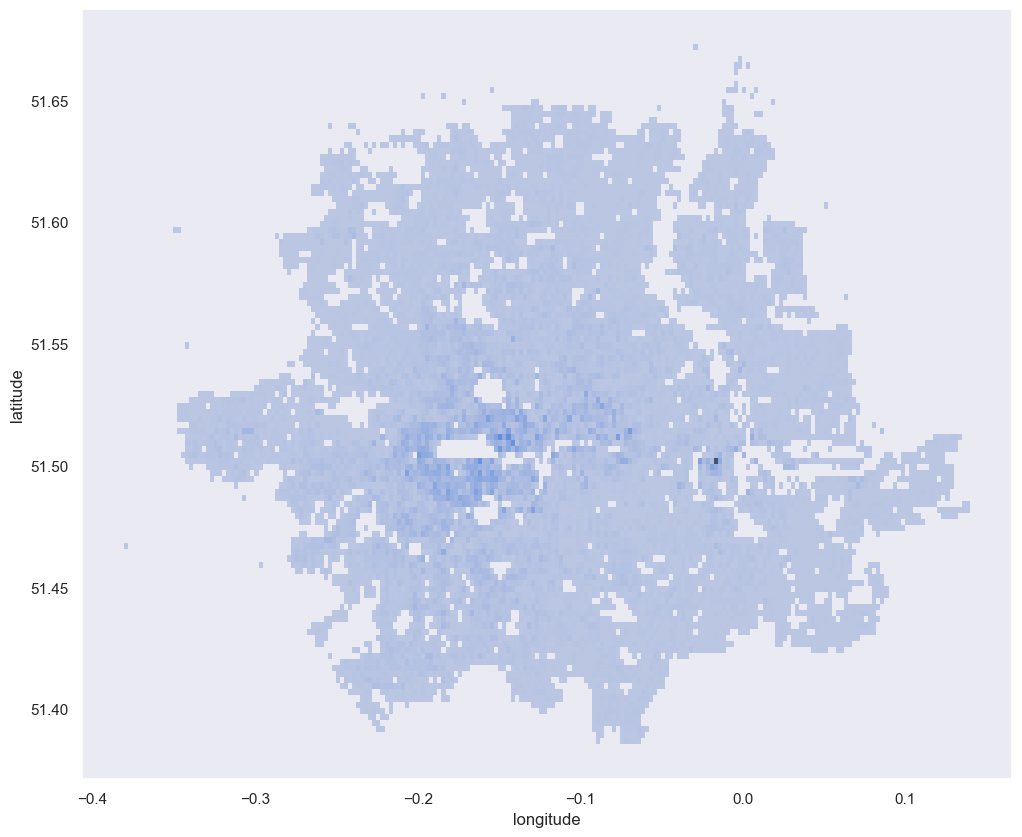

In [115]:
fig, ax = plt.subplots(figsize=(12, 10))
ax=sns.histplot(_df, x="longitude", y="latitude", weights="price", binwidth=0.0025)
ax.grid()

(0.0, 10000000.0)

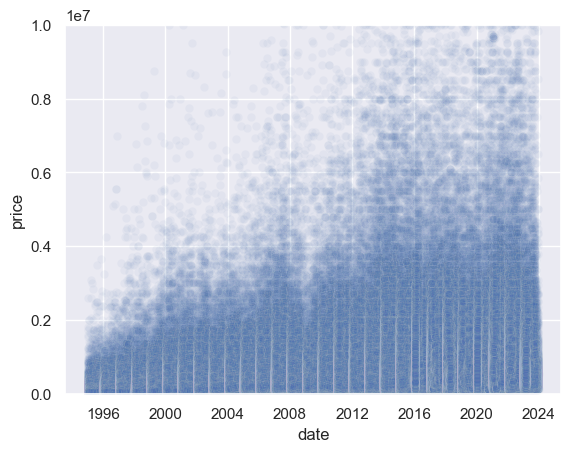

In [160]:
ax = sns.scatterplot(_df[_df.property_type != 'O'], x="date", y="price", alpha=0.05)
ax.set_ylim(0, 10e6)
#ax.set_yscale("log")

In [121]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day

In [123]:
df.to_feather("pdf-w-longlat-w-ymd.feather")

In [131]:
df.property_type.unique()          

['S', 'D', 'F', 'T', 'O']
Categories (5, object): ['D', 'F', 'O', 'S', 'T']

<Axes: xlabel='year', ylabel='price'>

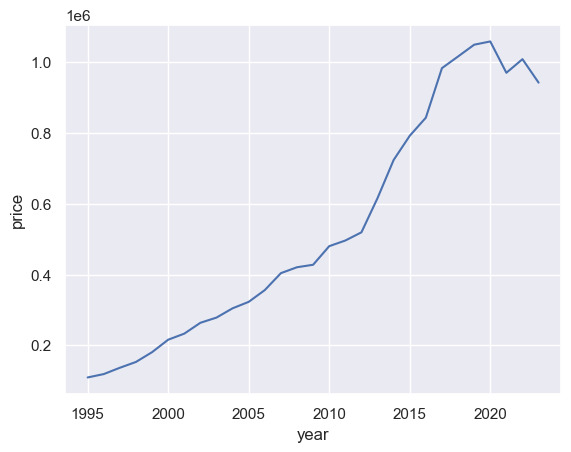

In [129]:
sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby("year").price.mean())


C:\Users\Patrick\AppData\Local\Temp\ipykernel_3884\3619409225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby(["year", "property_type"]).price.mean().reset_index(), x="year", y="price", hue="property_type")


(0.0, 3000000.0)

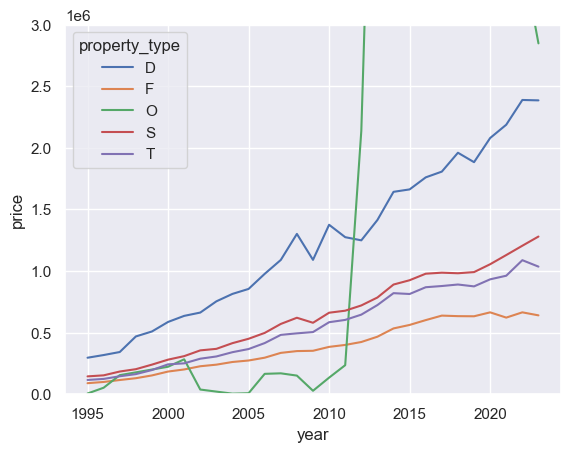

In [135]:
ax = sns.lineplot(df[(df.district == "LONDON") & (df.year < 2024)].groupby(["year", "property_type"]).price.mean().reset_index(), x="year", y="price", hue="property_type")
ax.set_ylim(0, 3e6)

C:\Users\Patrick\AppData\Local\Temp\ipykernel_3884\592731297.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _l = _df.groupby(["year", "property_type"]).price.mean() /  _df.groupby(["year", "property_type"]).price.mean().loc[y]


Text(0, 0.5, 'px ratio a/ 2000')

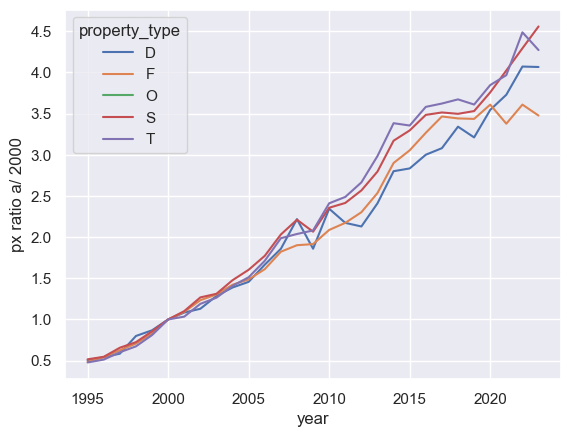

In [155]:
y = 2000
_df = (df[(df.district == "LONDON") & (df.year < 2024) & (df.property_type != 'O')])
_l = _df.groupby(["year", "property_type"]).price.mean() /  _df.groupby(["year", "property_type"]).price.mean().loc[y]
ax = sns.lineplot(_l.reset_index(), x="year", y="price", hue="property_type")
ax.set_ylabel(f"px ratio a/ {y}")
#ax.set_ylim(0, 10)


In [197]:
df.locality.unique()

array(['TYNE AND WEAR', 'THURROCK', 'CHESHIRE', 'STOCKTON-ON-TEES',
       'CUMBRIA', 'NORFOLK', 'SOUTH YORKSHIRE', 'GREATER LONDON',
       'NORTH YORKSHIRE', 'WEST MIDLANDS', 'SOMERSET', 'SLOUGH',
       'BRACKNELL FOREST', 'LANCASHIRE', 'WEST YORKSHIRE', 'SUFFOLK',
       'SOUTH GLAMORGAN', 'HAMPSHIRE', 'AVON', 'STAFFORDSHIRE',
       'MERSEYSIDE', 'CORNWALL', 'CLWYD', 'SOUTHEND-ON-SEA', 'HUMBERSIDE',
       'WEST SUSSEX', 'WARWICKSHIRE', 'NORTHAMPTONSHIRE', 'WARRINGTON',
       'SHROPSHIRE', 'HERTFORDSHIRE', 'BEDFORDSHIRE', 'BERKSHIRE',
       'OXFORDSHIRE', 'LINCOLNSHIRE', 'KENT', 'LEICESTERSHIRE', 'SURREY',
       'MID GLAMORGAN', 'HEREFORD AND WORCESTER', 'ESSEX',
       'GREATER MANCHESTER', 'BUCKINGHAMSHIRE', 'CONWY', 'NEWPORT',
       'MILTON KEYNES', 'CAMBRIDGESHIRE', 'SWANSEA', 'GLOUCESTERSHIRE',
       'BLACKPOOL', 'NORTHUMBERLAND', 'WORCESTERSHIRE', 'LUTON',
       'EAST SUSSEX', 'DERBYSHIRE', 'NOTTINGHAMSHIRE', 'BOURNEMOUTH',
       'GWENT', 'WOKINGHAM', 'STOKE-ON-TRENT'

In [161]:
df.dtypes

uuid                      object
price                      int64
date              datetime64[ns]
postal_code               object
property_type           category
new_build               category
estate_type             category
name_or_number            object
flat_number               object
street                    object
town_or_city              object
district                  object
county                    object
locality                  object
unknown_0                 object
unknown_1                 object
postcode                  object
latitude                 float64
longitude                float64
year                       int32
month                      int32
day                        int32
dtype: object

In [163]:
df.sample(5)

,uuid,price,date,postal_code,property_type,new_build,estate_type,name_or_number,flat_number,street,town_or_city,district,county,locality,unknown_0,unknown_1,postcode,latitude,longitude,year,month,day
14357785,{E5C427C0-ED7A-4495-AB08-C420C098D201},153000,2007-07-02,PO2 7LF,T,N,F,36,NaN,FUNTINGTON ROAD,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,PORTSMOUTH,A,A,PO2 7LF,50.813102,-1.066370,2007,7,2
9731109,{6DFD0F8B-A2E1-48F5-9093-6EA5B33CBFC0},46995,2003-07-18,TF7 4JL,T,N,F,53,NaN,STANWYCK,SUTTON HILL,TELFORD,WREKIN,WREKIN,A,A,TF7 4JL,52.633317,-2.435910,2003,7,18
28464108,{0B85394F-C870-69A5-E063-4704A8C07DAC},470000,2023-09-22,DT8 3RD,D,N,F,EASTERHILL,NaN,BRIDPORT ROAD,DRIMPTON,BEAMINSTER,DORSET,DORSET,A,A,DT8 3RD,50.841459,-2.824179,2023,9,22
7839761,{6E359817-F49A-414B-B60F-3A04554A9DD6},83500,2002-08-30,CV5 6GR,T,N,F,56,NaN,HIGHLAND ROAD,NaN,COVENTRY,COVENTRY,WEST MIDLANDS,A,A,CV5 6GR,52.401967,-1.534656,2002,8,30
11594717,{98B354E8-C460-4782-8E7C-F8ECE1CD265F},150000,2005-04-01,B69 2GD,D,N,F,2,NaN,EMBASSY ROAD,OLDBURY,OLDBURY,SANDWELL,WEST MIDLANDS,A,A,B69 2GD,52.505966,-2.029937,2005,4,1


In [164]:
df.shape

(28919900, 22)

# incorporate inflation

In [189]:
_district = df.district.unique().tolist()
_county = df.county.unique().tolist()

In [190]:
"ESSEX" in _district
"ESSEX" in _county

False

In [192]:
df = df.drop(columns=["postcode"])

In [195]:
df.to_feather("./pdf-w-longlat-w-ymd.feather")

In [202]:
len(df.county.unique())

467

In [203]:
idf = pd.read_csv("./UK-HPI-full-file-2023-09.csv")

In [221]:
_i = pd.Series(idf.RegionName.str.lower().unique())
_d = pd.Series(df.county.str.lower().unique())
_d[~_d.isin(_i)].head(60)

2                                   congleton
4                                    copeland
5                king's lynn and west norfolk
8                                      craven
11                             south somerset
19                            suffolk coastal
21                                scarborough
23                                 woodspring
26                                    penwith
27                           alyn and deeside
28                                  harrogate
30     the east yorkshire borough of beverley
36                                   daventry
40                                 the wrekin
42                         south bedfordshire
43                                    newbury
44                               macclesfield
48                             st edmundsbury
49                                northampton
57                                       ogwr
58                        south herefordshire
63                                

In [218]:
len(_d)

467

In [ ]:
# adjust price by hpi / inflation manually
# select few categorical and generate one-hot based on statistical significance
# run clustering on lat long data and build that into categorical data
# use temporal split to factor in temporal aspect?

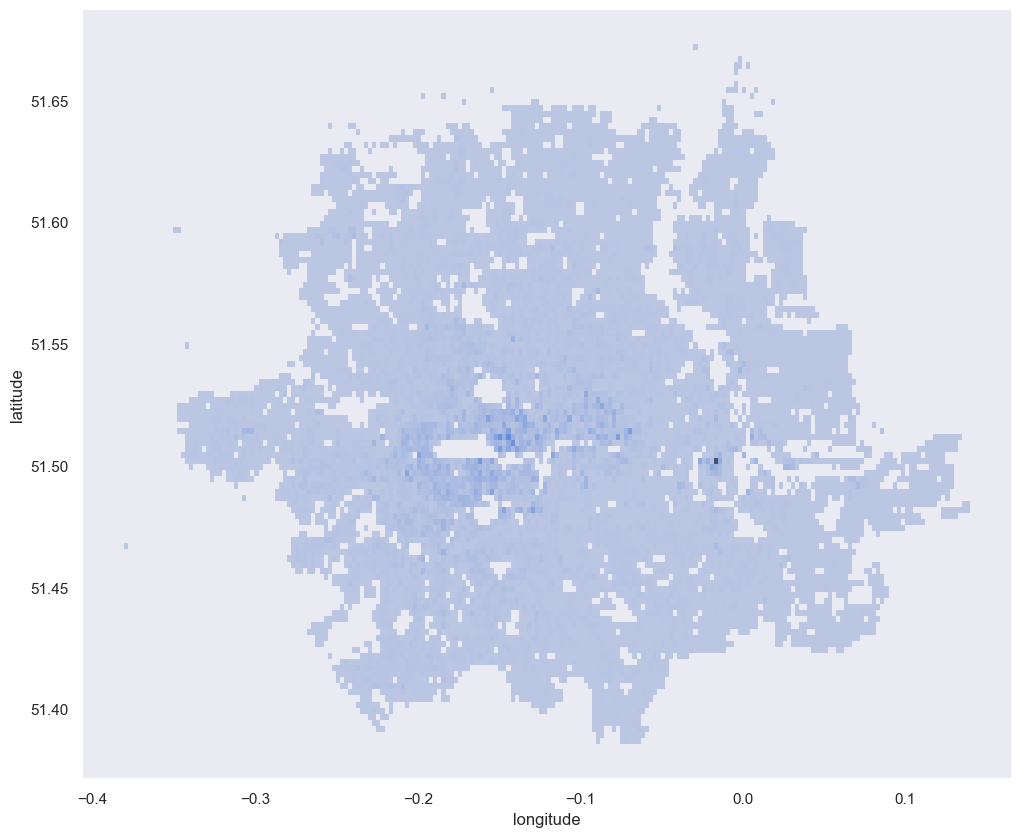

In [178]:
fig, ax = plt.subplots(figsize=(12, 10))
ax=sns.histplot(df[(df.year >= 2010) & (df.district == "LONDON")], x="longitude", y="latitude", weights="price", binwidth=0.0025)
ax.grid()          